### Linear Regression

Specifically models the relationship between a dependent variable and oen or more independent variables. Attempts to construct a linear function that outputs the value.

Aim of learning process is to find the best possible values of m and c in $y = mx+c$. Due to the nature of real-world data, no line can go through all the points.

Error: the difference between the independent variable's actual value and the value determind by our regression line. Want to find m, c such that the total cost, given by the average value of squared of the errors is minimised.

Usually data will have more than one column (components of x) that will be referred as $x_1, x_2, \cdots, x_n$ which will lead to a line that has slopes $m_1, m_2, \cdots, m_n$ across the n axes. So, the number of parameters you learn will be n+1, where n is the number of columns, or dimensions of the data.

In [37]:
import numpy as np
import pandas as pd
data = pd.DataFrame({"marks":[34,45,64,88,99,51],"salary":[3400,2900,4250,5000,5100,5600]})

#Recall, for learning or fitting the parameters for a mel, we can use fit() method that takes two arguments:
#indepdent variable x, dependent variable y
#X (usually capital) is the 2-d array of shape(n,d), n the number of training data rows, d the number of rows

X = np.array(data[['marks']].values)
y = np.array(data['salary'].values)

print(X.shape, y.shape)

(6, 1) (6,)


In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

In [39]:
print(reg.coef_)
print(reg.intercept_)
print(X[0:].shape)

#reg.coef_ is the gradient, reg.intercept_ the intercept

[25.30577489]
2768.083294627652
(6, 1)


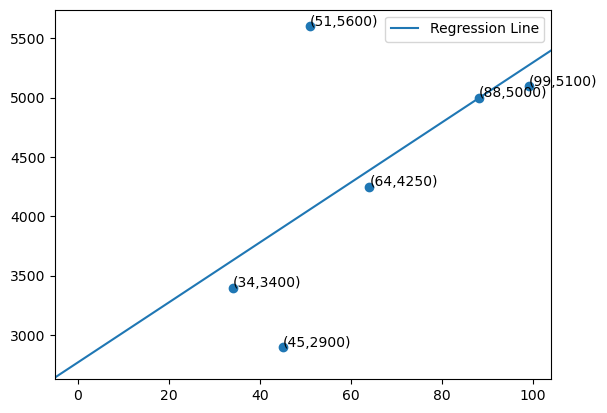

In [40]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.scatter(X, y)
ax.axline((0,reg.intercept_), slope=reg.coef_[0], label='Regression Line')
ax.legend()

for point in zip(X,y):
    ax.text(point[0][0], point[1]+5, "("+str(point[0][0])+","+str(point[1])+")")

plt.show()

### Evaluating Linear Regression:
In this example, we will simply compare how far our predictions are with respect to the actual values in the training dataset. We will prepare a dataframe that compares the actual salary values to the predicted values.

In [41]:
results_table = pd.DataFrame(data=X,columns=['Marks'])
results_table['Predicted Salary'] = reg.predict(X)
results_table['Actual Salary'] = y
results_table['Error'] = results_table['Actual Salary'] - results_table['Predicted Salary']
results_table['Error Squared'] = results_table['Error'] * results_table['Error']

results_table

import math

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
mean_absolute_error = np.abs(results_table['Error']).mean()
mean_squared_error = results_table['Error Squared'].mean()
root_mean_squared_error = math.sqrt(mean_squared_error)

print(mean_absolute_error)
print(mean_squared_error)
print(root_mean_squared_error)

515.4435671156526
581772.5912163905
762.7401859194194


Scikit-learn also provides R squared value that measures how much variability in a dependent variable can be explained by the model. It's value is between 0 and 1, with 1 representing the ideally best possible model.

In [42]:
from sklearn.metrics import r2_score
print("R Squared: %.2f" % r2_score(y, reg.predict(X)))

R Squared: 0.37
